In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format='{:.2f}'.format
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',100)

In [3]:
df=pd.read_csv('loan.csv',low_memory=False)

In [4]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39717, 111)

## Data Cleaning

### Removing Null values 

In [6]:
# Removing  column which has all the values as null 
df.dropna(axis=1, how='all',inplace=True)
df.shape

(39717, 57)

### Removing unique values

In [7]:
# Removing constant fields from data frame 
df.nunique().sort_values().apply(lambda x : True if x==1 else False).head(14)


tax_liens                      True
delinq_amnt                    True
chargeoff_within_12_mths       True
acc_now_delinq                 True
application_type               True
policy_code                    True
collections_12_mths_ex_med     True
pymnt_plan                     True
initial_list_status            True
term                          False
next_pymnt_d                  False
pub_rec_bankruptcies          False
loan_status                   False
verification_status           False
dtype: bool

In [8]:
df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','pymnt_plan','initial_list_status'],axis=1, inplace=True)

In [9]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00


In [10]:
df.shape

(39717, 48)

### Formating Date Field Column

In [11]:
df['term'] = df.term.str.strip()
df['Charged_Off'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
df['emp_experience'] = df['emp_length'].astype('str') 
df['emp_experience'] = df['emp_experience'].apply(lambda x: x.split(' ')[0]).replace({'<': 0,'10+': 10},regex=True)
df['emp_experience'] = df['emp_experience'].astype('float64')

In [12]:
#Convert Data Type 
df['int_rate'] = df.int_rate.str.strip('%').astype(float)
df['revol_util'] = df.revol_util.str.strip('%').astype(float)

In [13]:
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_d_year'] = df.issue_d.dt.year
df['issue_d_month'] = df.issue_d.dt.strftime('%b')
df['issue_d_weekday'] = df.issue_d.dt.weekday
df['earliest_cr_line_year'] = df.earliest_cr_line.dt.year
df['earliest_cr_line_month'] = df.earliest_cr_line.dt.strftime('%b')
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

df.emp_length = pd.to_numeric(df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,Charged_Off,emp_experience,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,2011-12-01,1,NaN,NaN,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2011-12-01,171.62,NaN,2011-12-01,0.00,0,10.00,2011,Dec,3,2011,Dec
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,2011-12-01,5,NaN,NaN,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2011-12-01,119.66,NaN,2011-12-01,0.00,1,0.00,2011,Dec,3,2011,Dec
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2011-12-01,2,NaN,NaN,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2011-12-01,649.91,NaN,2011-12-01,0.00,0,10.00,2011,Dec,3,2011,Dec


In [14]:
df['approved_amount_perct'] = round(df.funded_amnt_inv*100/df.loan_amnt,2)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,Charged_Off,emp_experience,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_amount_perct
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,2011-12-01,1,NaN,NaN,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2011-12-01,171.62,NaN,2011-12-01,0.00,0,10.00,2011,Dec,3,2011,Dec,99.50
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,2011-12-01,5,NaN,NaN,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2011-12-01,119.66,NaN,2011-12-01,0.00,1,0.00,2011,Dec,3,2011,Dec,100.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2011-12-01,2,NaN,NaN,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2011-12-01,649.91,NaN,2011-12-01,0.00,0,10.00,2011,Dec,3,2011,Dec,100.00


#### "Current" loans can be ignored from analysis since they are irrelevant, we want to compare only fully paid and charged off loans only

In [15]:
df = df[df.loan_status != "Current"]
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Univariate Analysis


<Axes: xlabel='loan_status', ylabel='count'>

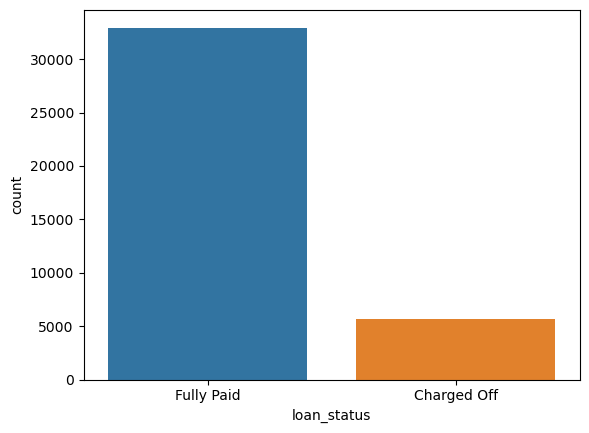

In [16]:
sns.countplot(x = 'loan_status', data = df)

### Analysing Grade and Sub-grade

<Axes: xlabel='sub_grade'>

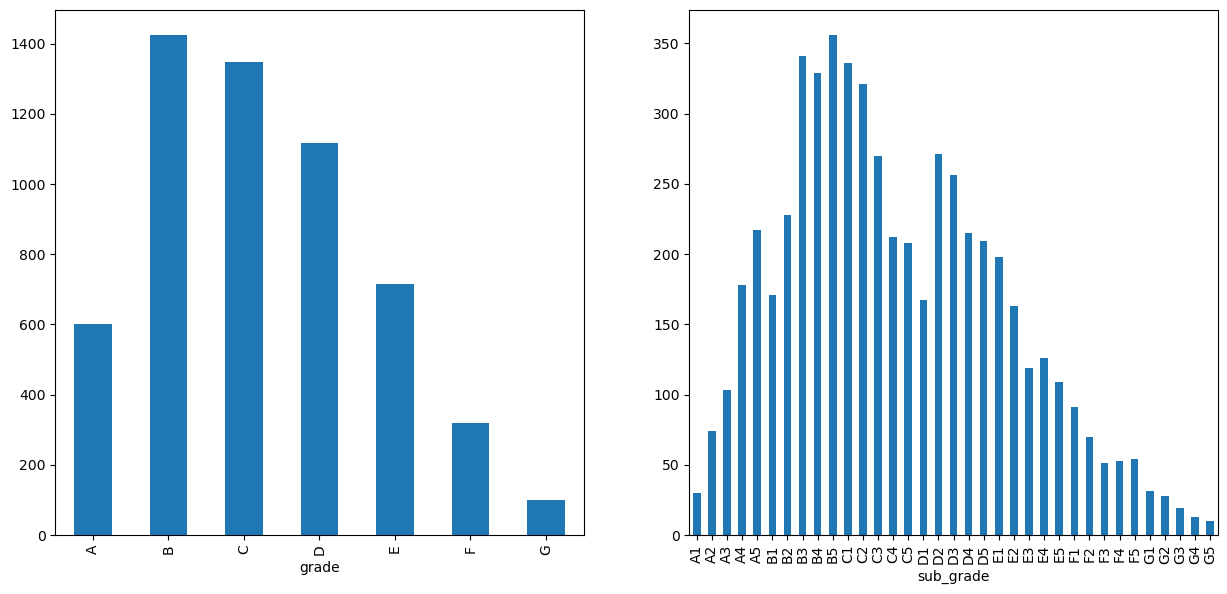

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(221)
df[df['loan_status']=='Charged Off'].groupby('grade').grade.count().plot.bar()
plt.subplot(222)
df[df['loan_status']=='Charged Off'].groupby('sub_grade').grade.count().plot.bar()


**Observations**:<br>
Max loan charge-offs are from loans with Grade as B and Sub-Grade as B5 

### Approve Loan Amount Percent

<Axes: xlabel='approved_amount_perct', ylabel='Count'>

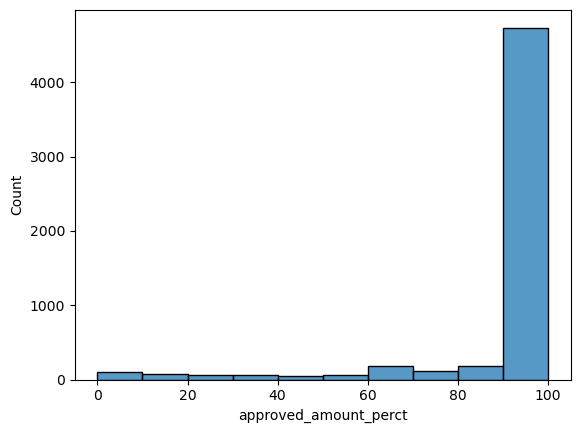

In [18]:
sns.histplot(df[df['loan_status']=='Charged Off'].approved_amount_perct, bins=10)
 

**Observations**:<br>
Below plot shows that most of the loan were fully funded.

### Analysing Loan Amount

<Axes: xlabel='loan_amnt', ylabel='Count'>

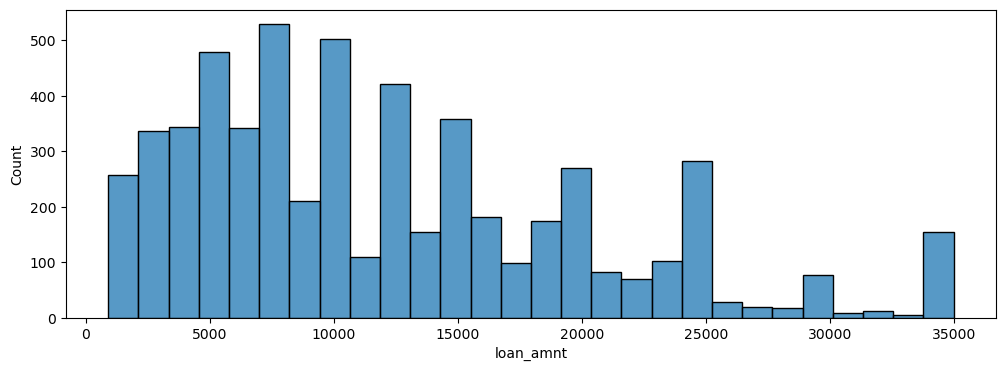

In [19]:
plt.figure(figsize=(12,4))
sns.histplot(data=df[df['loan_status']=='Charged Off'].loan_amnt)


**Observations**:<br>
More number of people have charged-off loans when the loan amount is between **5000** & **10000**


### Analyzing Loan Status counts by issued month and year

<Axes: xlabel='issue_d_year'>

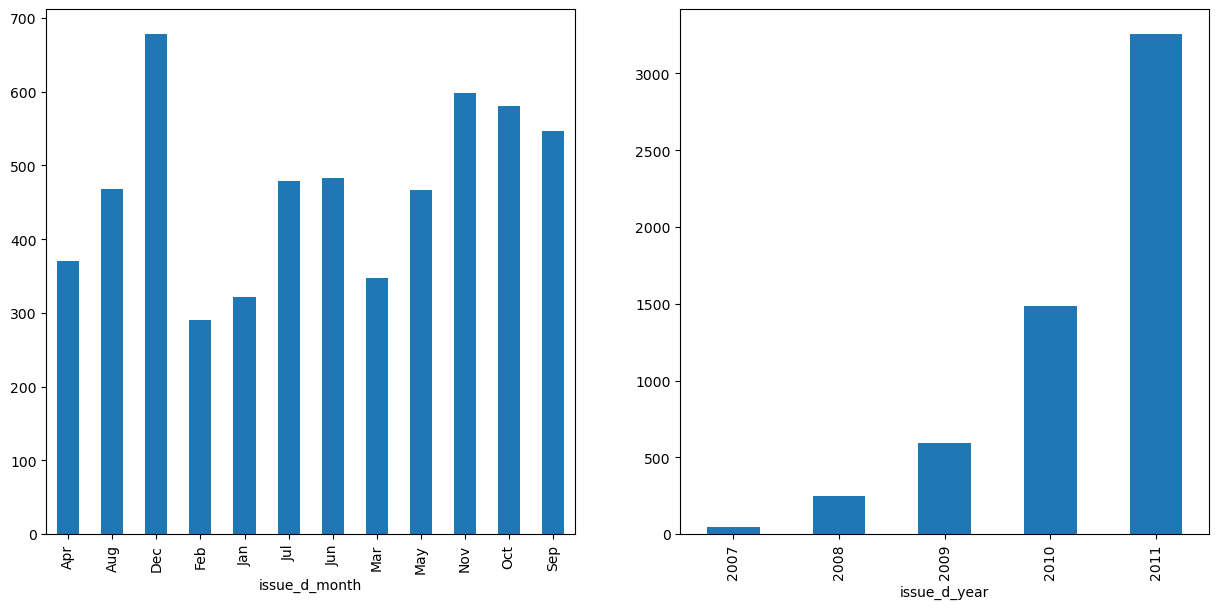

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(221)
df[df['loan_status']=='Charged Off'].groupby('issue_d_month').grade.count().plot.bar()
plt.subplot(222)
df[df['loan_status']=='Charged Off'].groupby('issue_d_year').grade.count().plot.bar()


**Observations**:<br>
Loans sanctioned/issued in Dec &  year 2011 had maximum possbility of getting charged-off.

### Analysing Funded Amount vs Loan Amount vs Funded Amount Inv

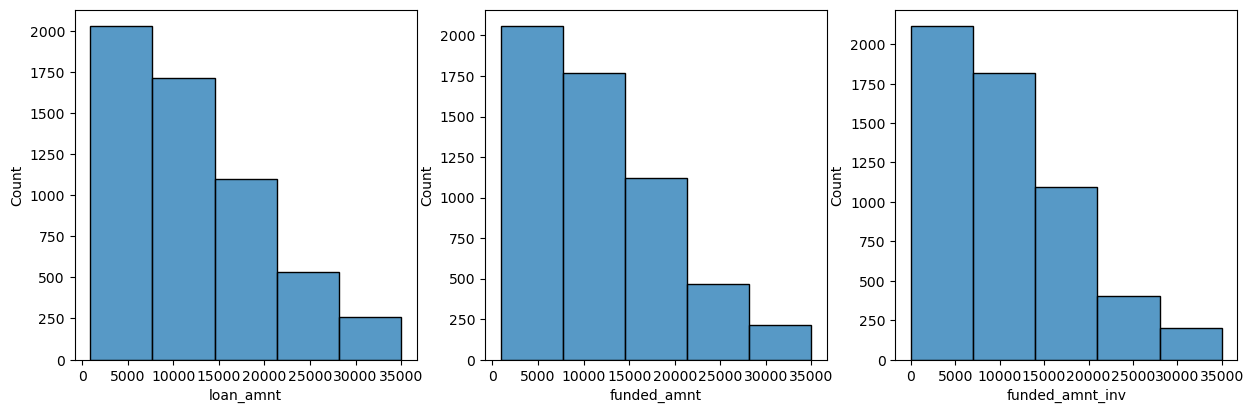

In [21]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
plt.subplot(2, 3, 1)
sns.histplot(df[df['loan_status']=='Charged Off']['loan_amnt'],bins=5)
plt.subplot(2, 3, 2)
sns.histplot(df[df['loan_status']=='Charged Off']['funded_amnt'],bins=5)
plt.subplot(2, 3, 3)
sns.histplot(df[df['loan_status']=='Charged Off']['funded_amnt_inv'],bins=5)
plt.show()


**Observations**:<br>
More number of people have charged-off loans when the loan amount and funded amount (inv) is between **5000** & **10000**

###  Charged off and Verification Status 

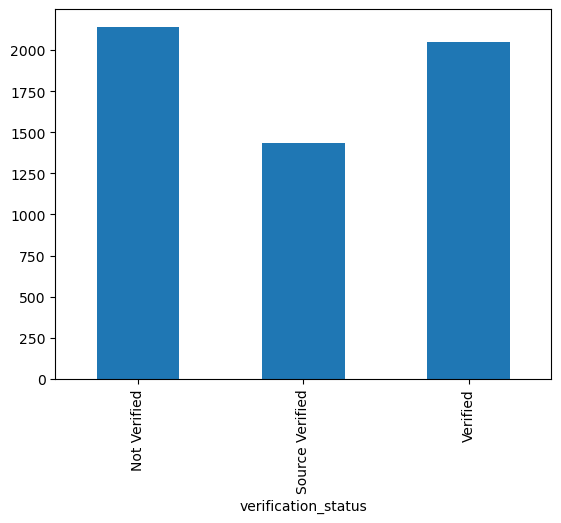

In [22]:
df[df['loan_status']=='Charged Off'].groupby('verification_status')['verification_status'].count().plot.bar()
plt.show()

**Observations**:<br>
Not Verified loans are more likely to be charged off 

### Analysing  Home ownership

<Axes: xlabel='home_ownership'>

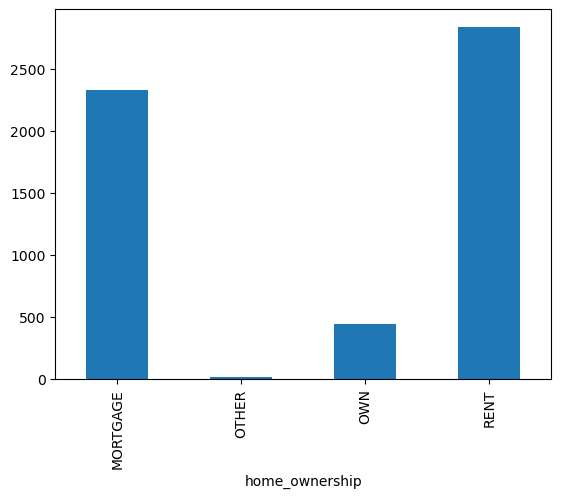

In [23]:
df[df['loan_status']=='Charged Off'].groupby('home_ownership').home_ownership.count().plot.bar()
 

**Observations**:<br>
Most of the Loan applicants who defaulted lived in a Rented accomodation

### Analysing Purpose

<Axes: xlabel='count', ylabel='purpose'>

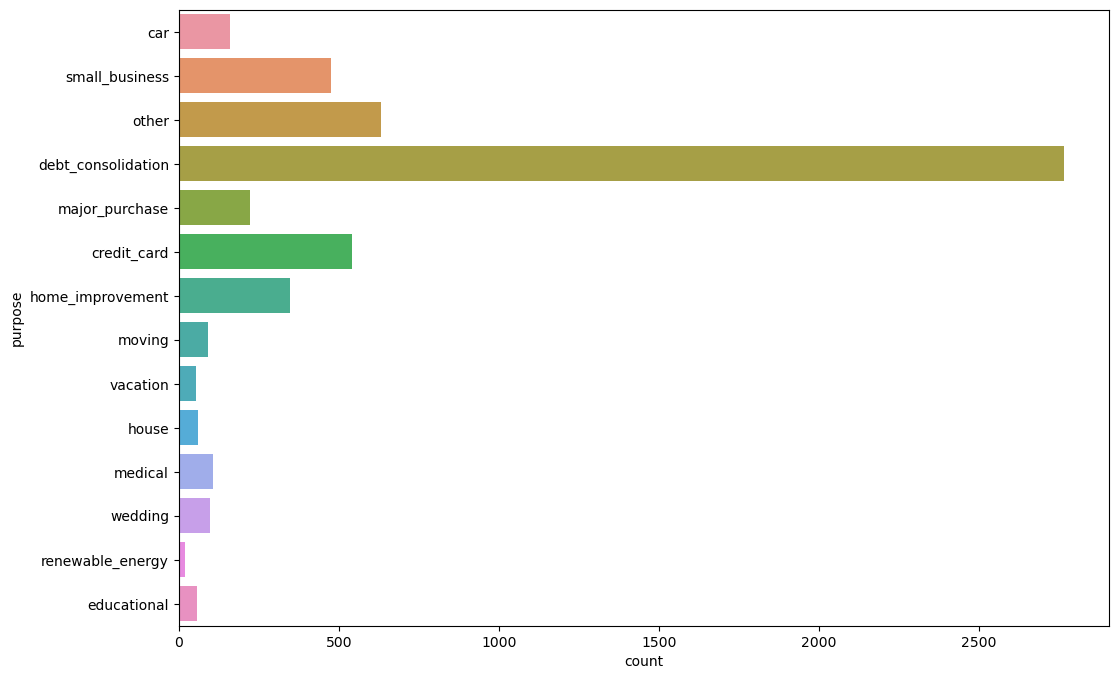

In [24]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=df[df['loan_status']=='Charged Off'])


**Observations**:<br>
Most of the Loan applicants who defaulted we taking loan for debt consolidation

### Interest Rate

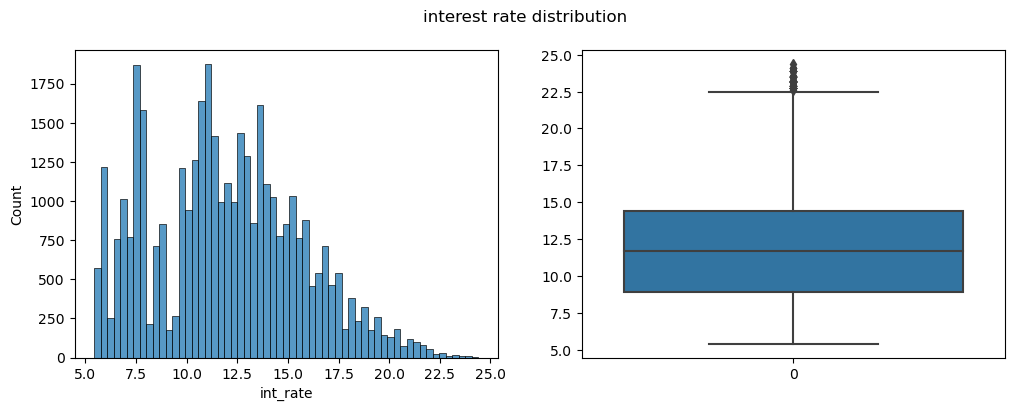

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df.int_rate)
plt.subplot(1,2,2)
sns.boxplot(df.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

**Observations**:<br>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **9% to 14.5%**. Some people took loan at higher rates of interest i.e., **22.5%**

### Installment
The monthly payment owed by the borrower if the loan originates.

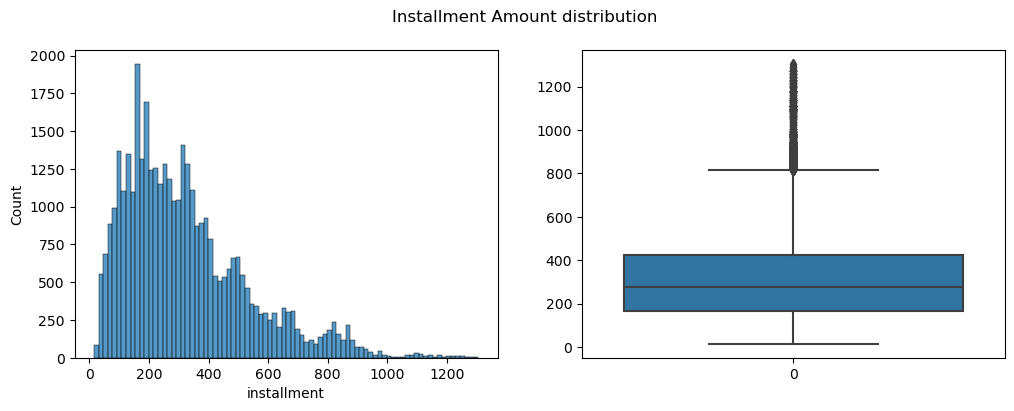

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df.installment)
plt.subplot(1,2,2)
sns.boxplot(df.installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Observations**:<br>
The Most representative value of Installment amount in around **280**

## Segmented Univariate Analysis

In [54]:
#grouping the data for int_rate,open_acc,revol_util,total_acc,annual_inc
df['int_rate_groups'] = pd.cut(df['int_rate'], bins=5,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%','25%-30%'])
df['annual_inc_groups'] = pd.cut(df['annual_inc'], bins=5,precision =0,labels =['1k-30k','30k-60k','60k-90k','90k-120k','120k-150k'])
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


In [55]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,Charged_Off,emp_experience,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_amount_perct,int_rate_groups,annual_inc_groups,loan_amnt_groups
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,2011-12-01,1,NaN,NaN,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2011-12-01,171.62,NaN,2011-12-01,0.00,0,10.00,2011,Dec,3,2011,Dec,99.50,10%-15%,1k-30k,0-5k
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,2011-12-01,5,NaN,NaN,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2011-12-01,119.66,NaN,2011-12-01,0.00,1,0.00,2011,Dec,3,2011,Dec,100.00,15%-20%,1k-30k,0-5k
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2011-12-01,2,NaN,NaN,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2011-12-01,649.91,NaN,2011-12-01,0.00,0,10.00,2011,Dec,3,2011,Dec,100.00,15%-20%,1k-30k,0-5k
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,2011-12-01,1,35.00,NaN,10,0,5598,21.00,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2011-12-01,357.48,NaN,2011-12-01,0.00,0,10.00,2011,Dec,3,2011,Dec,100.00,15%-20%,1k-30k,5k-10k
5,1075269,1311441,5000,5000,5000.00,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,2011-12-01,3,NaN,NaN,9,0,7963,28.30,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2011-12-01,161.03,NaN,2011-12-01,0.00,0,3.00,2011,Dec,3,2011,Dec,100.00,5%-10%,1k-30k,0-5k


### Analysing  Interest Rate 

<Axes: xlabel='emp_length', ylabel='count'>

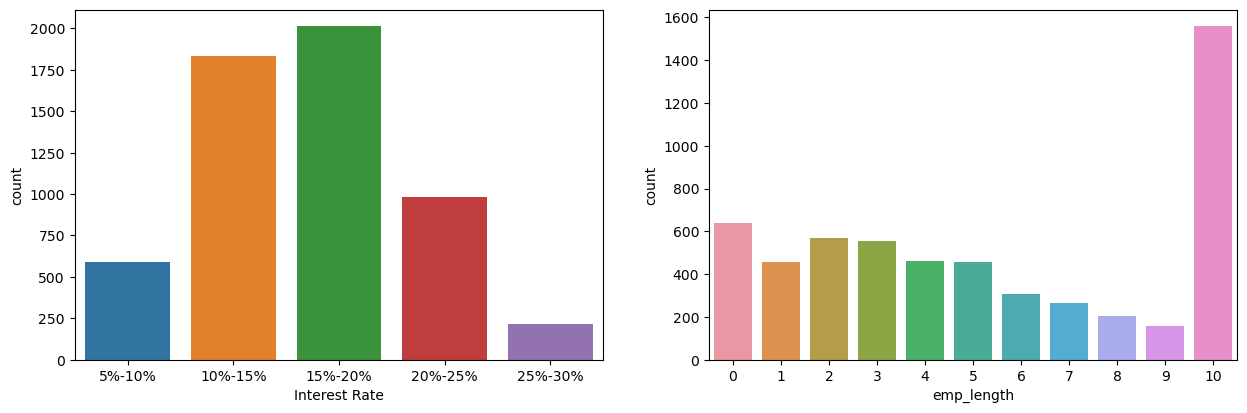

In [56]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=df[df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=df[df.loan_status == 'Charged Off'])

**Observations**:<br>
Most loan charged-off was when interest rate between 15-20% and when Emp experience was 10 years.

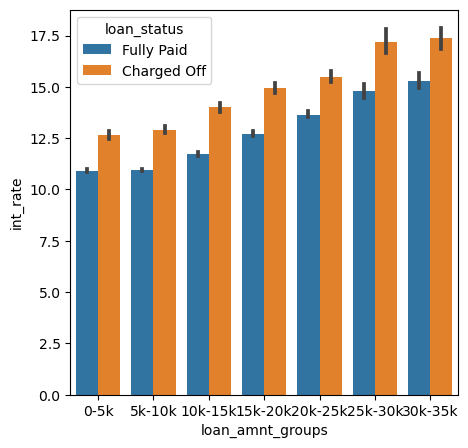

In [57]:
plt.figure(figsize=(5,5))
sns.barplot(data =df,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.show()

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

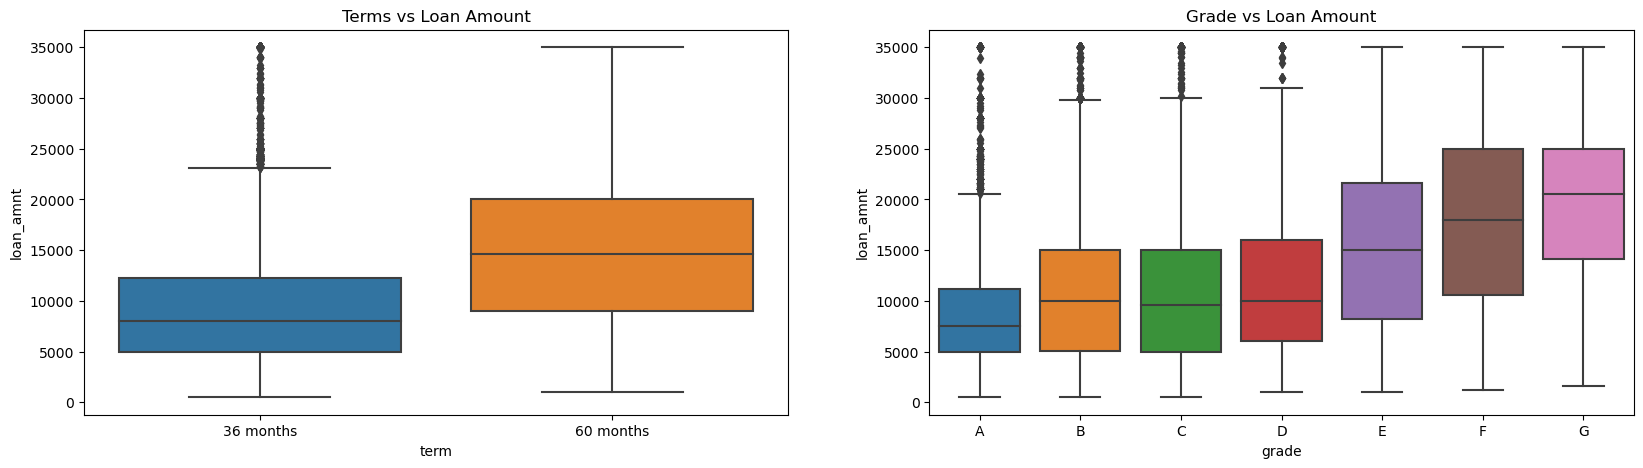

In [30]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=df.loan_amnt, data=df)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
grade_ord = df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=df.loan_amnt, order = grade_ord, data=df)

**Observations**:<br>
Higher amount loans have high tenure i.e, 60 months.   Grade 'F' and 'G' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

<Axes: title={'center': 'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

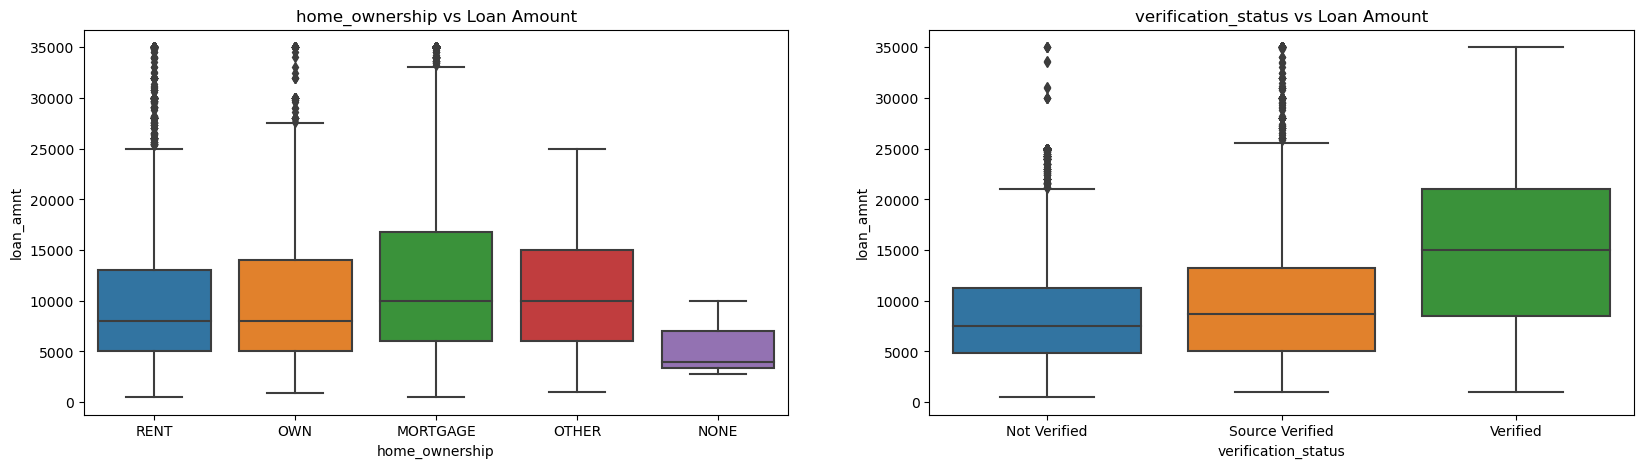

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=df.loan_amnt, data=df)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=df.loan_amnt, order = verification_status_ord, data=df)

**Observations**:<br>
People who borrow loan are more from  MORTAGE 

Text(0.5, 1.0, 'emp_experience vs Loan Amount')

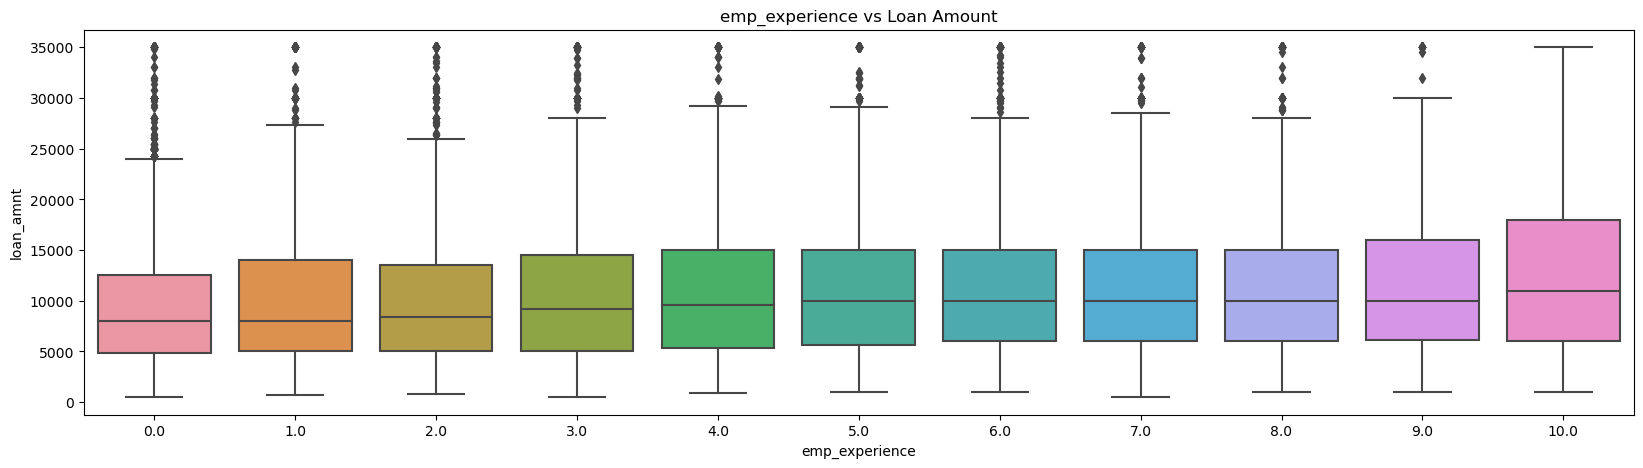

In [32]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_experience', y=df.loan_amnt, data=df)
plt.title('emp_experience vs Loan Amount')


**Observations**:  
People who borrowed loan are from 10+ years and least is <1 year.  Seems like 0-1 year experience has many outliers and higher loans were given to individuals in 0-1 experience range.

### Interest Rate

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

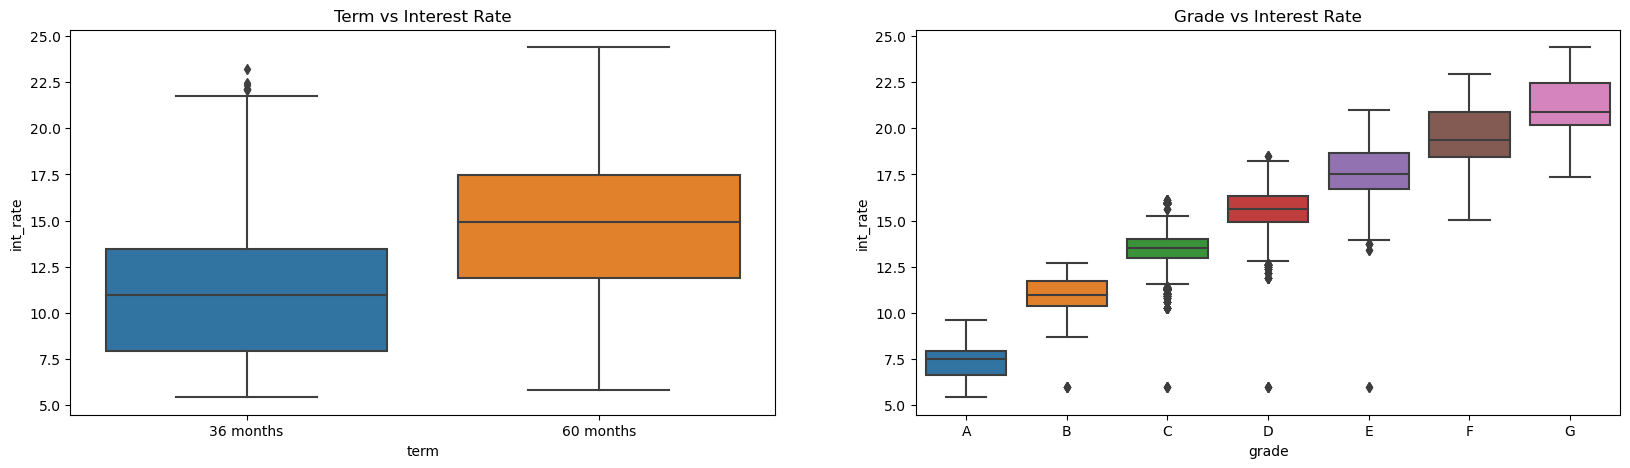

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=df.int_rate, data=df)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=df.int_rate, order = grade_ord, data=df)

**Observation**:  
The interest rates are higher for Higher tenure loans.  
And Also Interest Rates are Higher as Grades are Lowering (A to G).

## Univariate Analysis Obervations 

The maximum number of loan charge-offs occurs with loans graded as 'B' and sub-graded as 'B5.'

The Approved Loan Amount Percentage indicates that a significant majority of loans were fully funded.

Charged-off loans are more prevalent when the loan amount falls within the range of $5000 to $10000.

Loans sanctioned in December of the year 2011 have the highest likelihood of being charged-off.

Charged-off loans are more common when both the loan amount and funded amount (inv) are between $5000 and $10000.

Not Verified loans are more prone to being charged off.

Most defaulted loan applicants reside in rented accommodations.

Debt consolidation is the most common loan purpose among applicants who defaulted.

Interest rates generally range between 9% to 14.5%, with some instances of higher rates, such as 22.5%.

The most representative value for the installment amount is around $280.

The majority of charged-off loans occur when the interest rate is between 15-20%, and the employment experience is 10 years.

Higher loan amounts tend to have longer tenures, particularly 60 months. Grades 'F' and 'G' take the maximum loan amounts, showing an inverse relationship between grade and loan amount.

Mortgage is the most common category for individuals borrowing loans.

Loan borrowers are predominantly in the 10+ years of employment category, with fewer individuals in the <1 year category. The 0-1 year experience range has numerous outliers, and higher loans are often granted to individuals within this range.

Higher tenure loans generally have higher interest rates.

Interest rates tend to be higher as loan grades decrease from 'A' to 'G'.

## Bivariant Analysis 

### Annual Income Vs Purpose

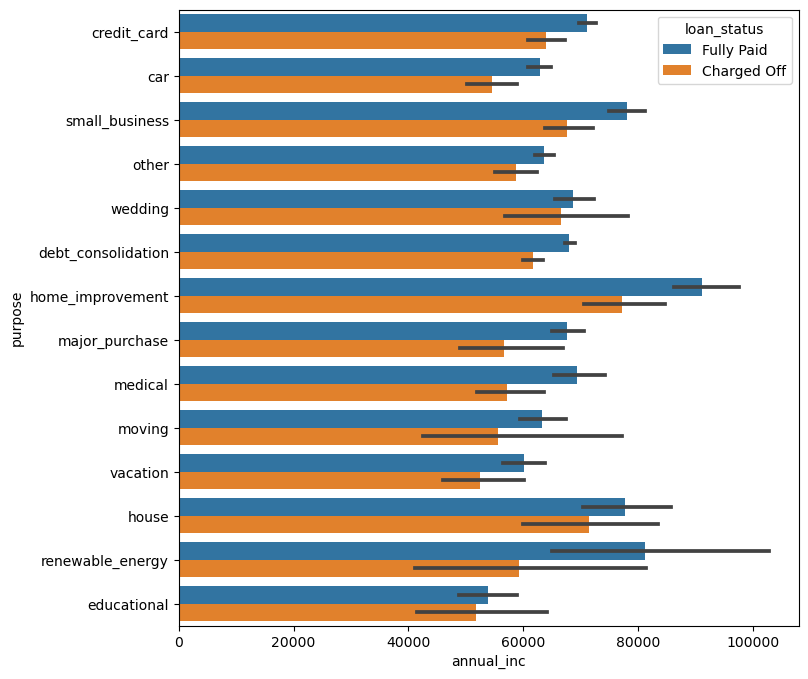

In [34]:
plt.figure(figsize=(8,8))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

**Observation**:  
- Most Charged off loans were the once where income was betwen 50k and 80K and loan purpose was home_improvement

### Loan Amount vs House Ownership

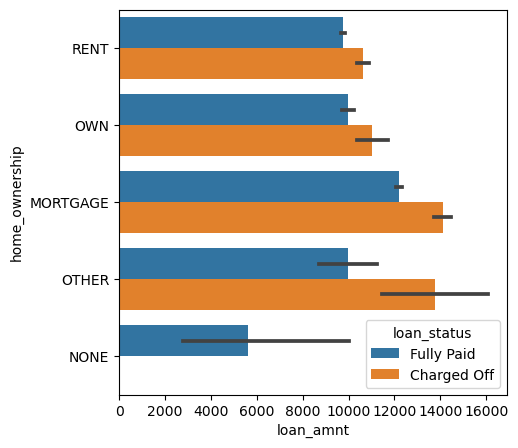

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(data =df,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

**Observation**:  
- Most Charged off loans were the once where loan amount was between 10k & 15k and ownership was Mortgage.

###  Grades vs Charged Off

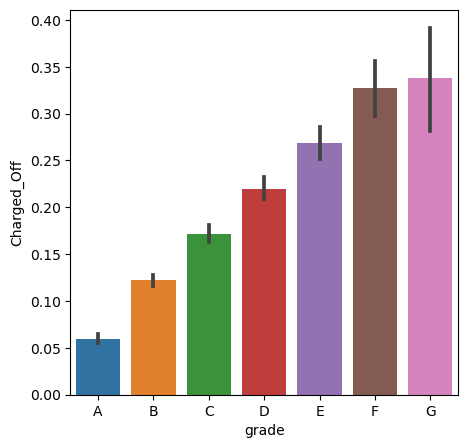

In [36]:
plt.figure(figsize=(5, 5))
order_grades = df.groupby(["grade"])['Charged_Off'].aggregate(np.mean).reset_index().sort_values('Charged_Off') 
sns.barplot(data=df, y='Charged_Off', x='grade', order=order_grades['grade'])
plt.show()



**Observations**:<br>
This chart explain that most  of the charged off loan are part of G and F grade category 

###  Charged Off vs Issue Year

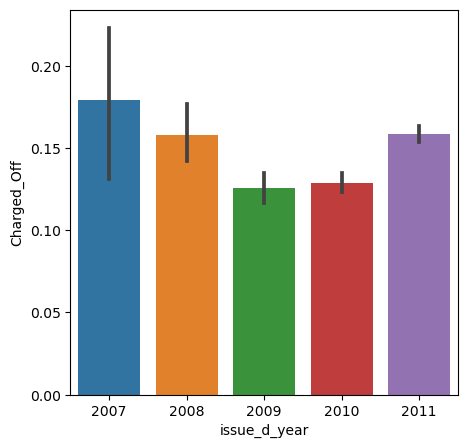

In [37]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df, y='Charged_Off', x='issue_d_year')
plt.show()


**Observations**:<br>
This Grapgh explain that Most of the Charged off happen on the year of 2007 

###  Charged Off vs Purpose 

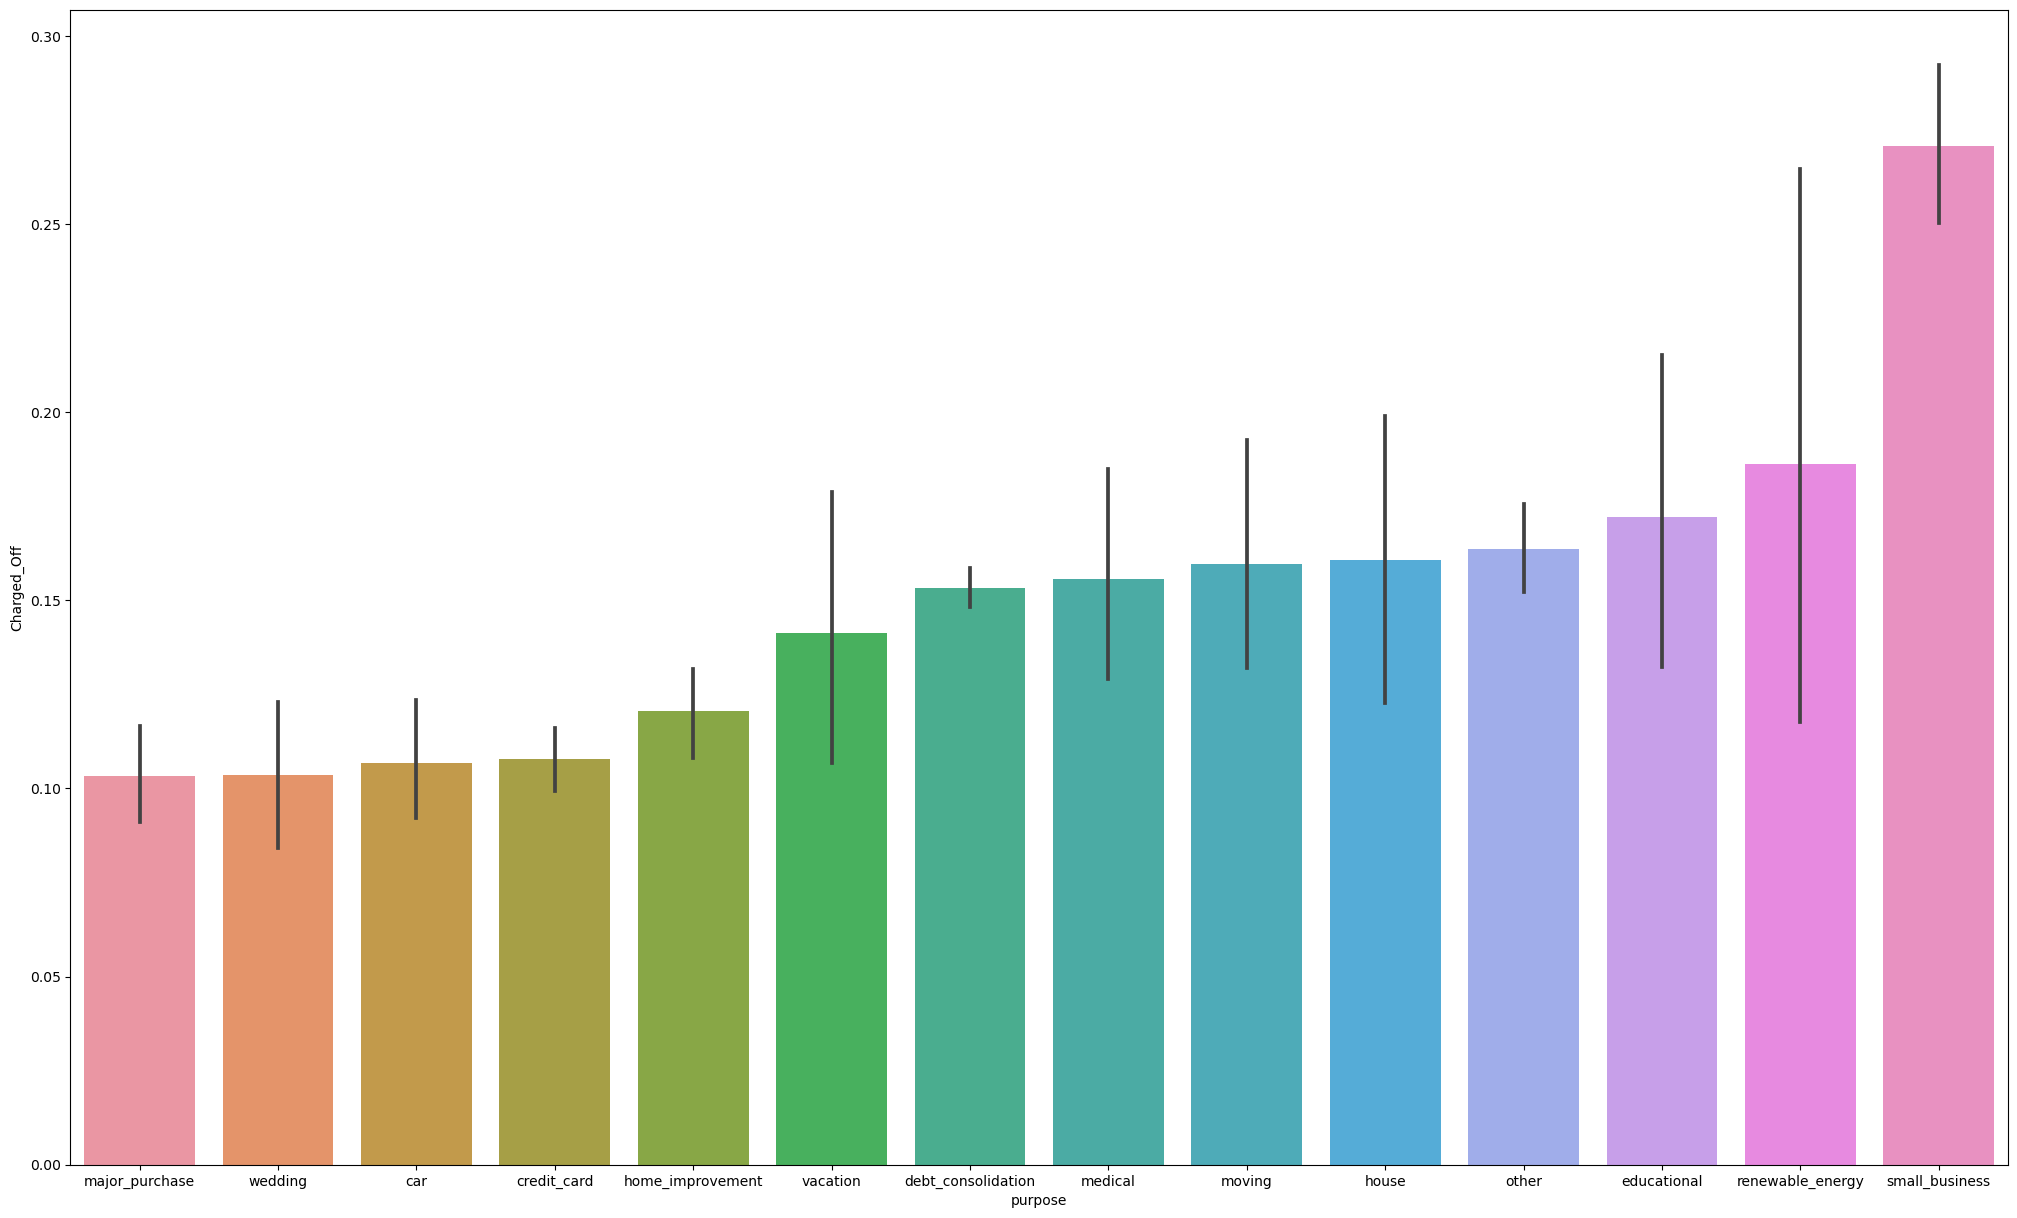

In [38]:
plt.figure(figsize=(25, 15))
order_business = df.groupby('purpose').Charged_Off.aggregate(np.mean).reset_index().sort_values('Charged_Off')
sns.barplot(data=df, y='Charged_Off', x='purpose', order=order_business['purpose'])
plt.show()


**Observations**:<br>
Loan application who were charged off took loan for Small Business earning category  

### Changed off vs Issue Year

In [39]:
df.int_rate.replace('%', '', inplace=True, regex=True)
df.int_rate =df.int_rate.astype('float64')
df.int_rate.head()

0   10.65
1   15.27
2   15.96
3   13.49
5    7.90
Name: int_rate, dtype: float64

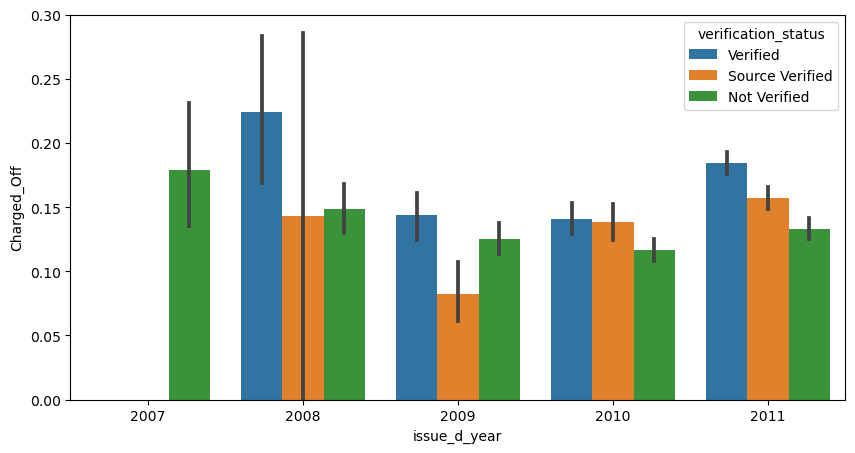

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, y='Charged_Off', x='issue_d_year',hue='verification_status')
plt.show()
  

**Observations**:<br>
This gaph explain chanrged off applicant vs Verificatin across years and it seems verification status
is not hihghly co-related with with verifation steps. 

### Charged Off vs Employee Experience

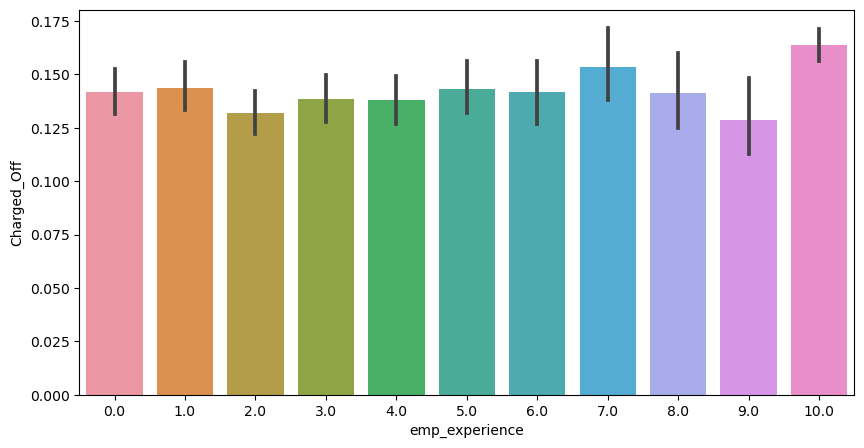

In [41]:
df['emp_experience'] = df['emp_length'].astype('str') 
df['emp_experience'] = df['emp_experience'].apply(lambda x: x.split(' ')[0]).replace({'<': 0,'10+': 10},regex=True)
df['emp_experience'] = df['emp_experience'].astype('float64')
plt.figure(figsize=(10, 5))
sns.barplot(data=df, y='Charged_Off', x='emp_experience')
plt.show()



**Observations**:<br>
There is no co-relation between employee experience and charged off

### Annual Income vs Charged off

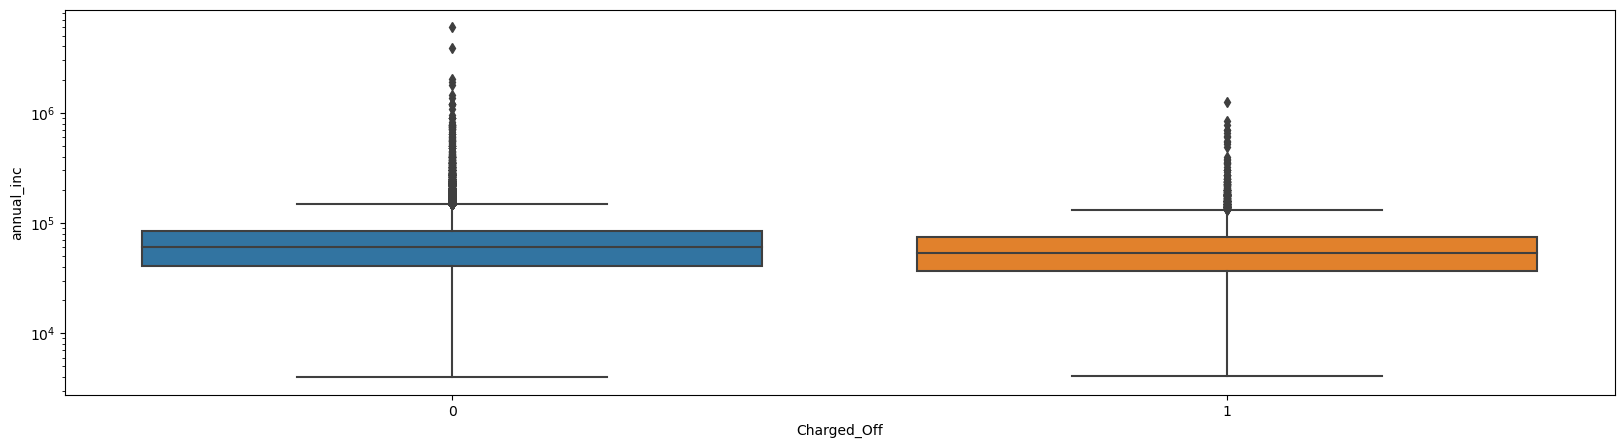

In [42]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Charged_Off', y=df.annual_inc, data=df)
plt.yscale('log')
 

**Observations**:<br>
People with lower annual income are more prone to be charged off 

### Employment Length

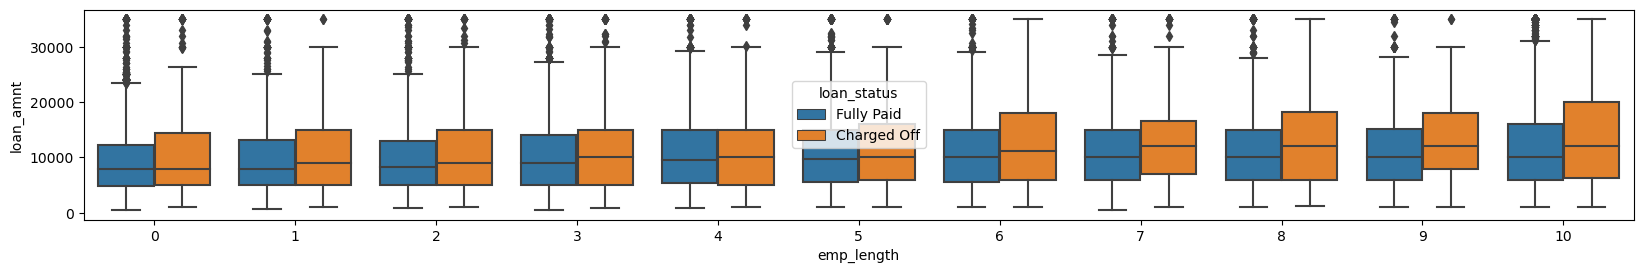

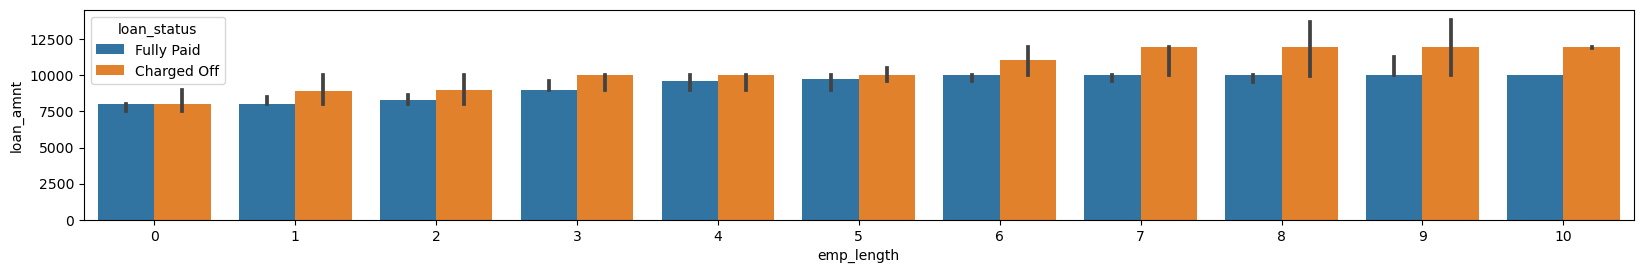

In [43]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df, estimator=np.median)
plt.show()

**Observations:**  
Employees with longer working history tend to get loan approved/verified for a higher amount which also results in higher charged-off total loan amount.

### Loan Amount vs Annual income

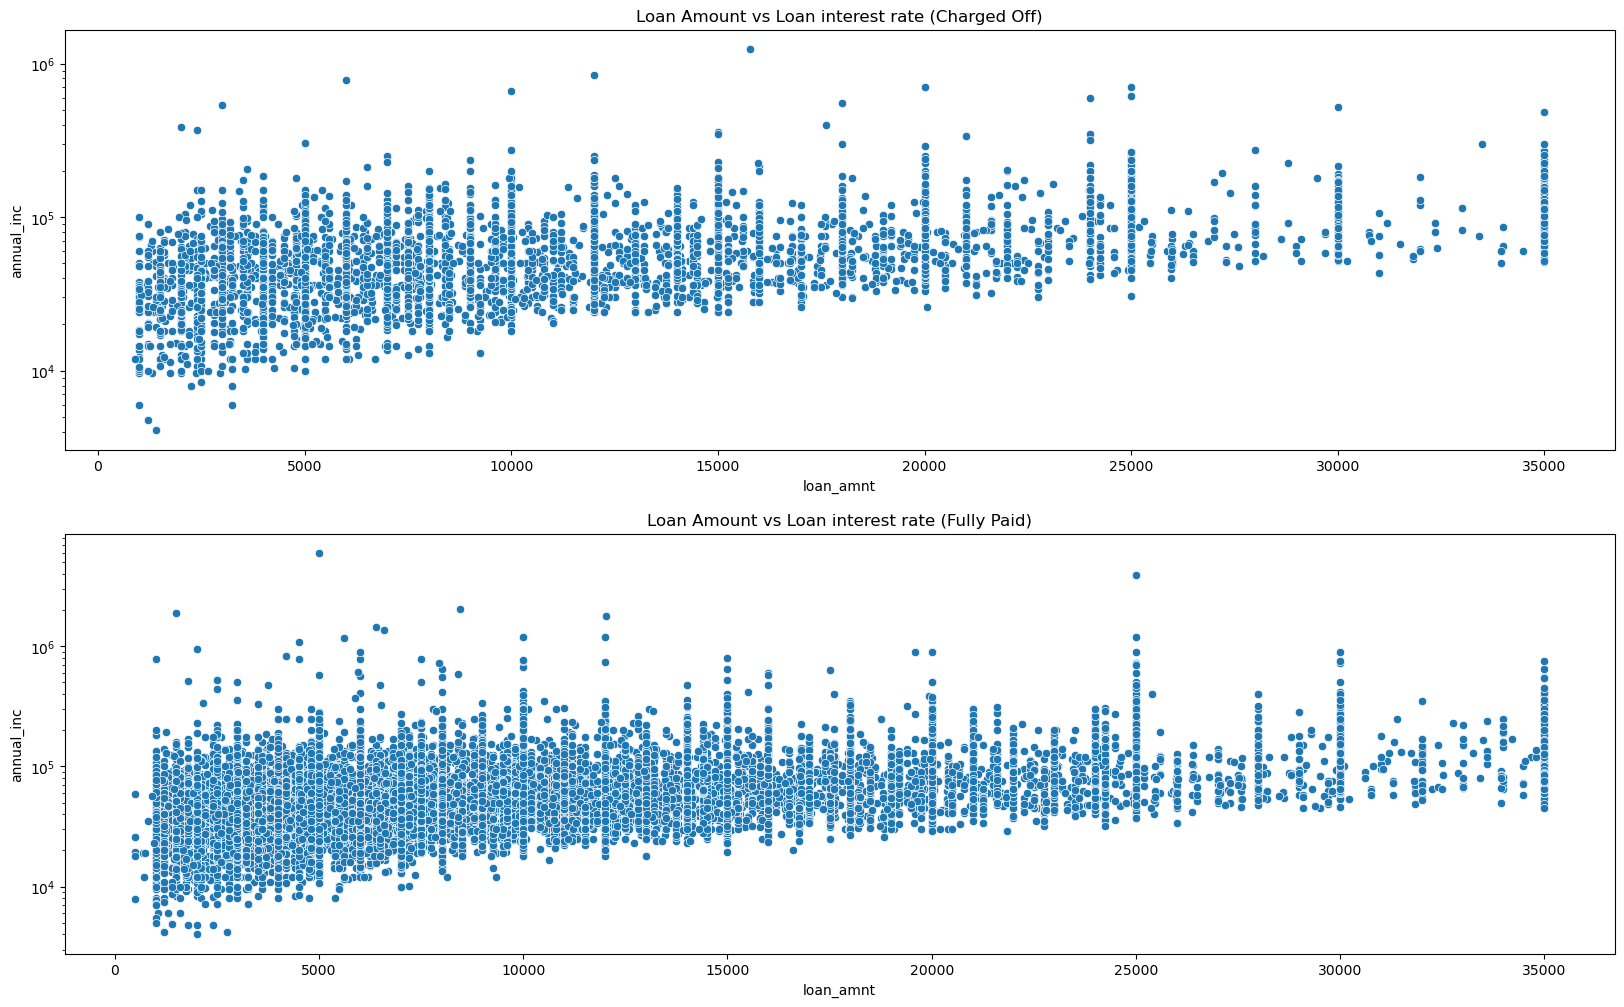

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

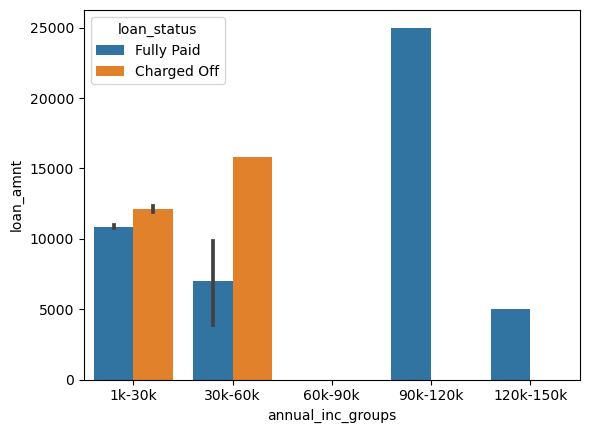

In [44]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=df[df.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=df[df.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = df)

**Observations**  
Charged Off & Fully Paid loans has similar pattern but 

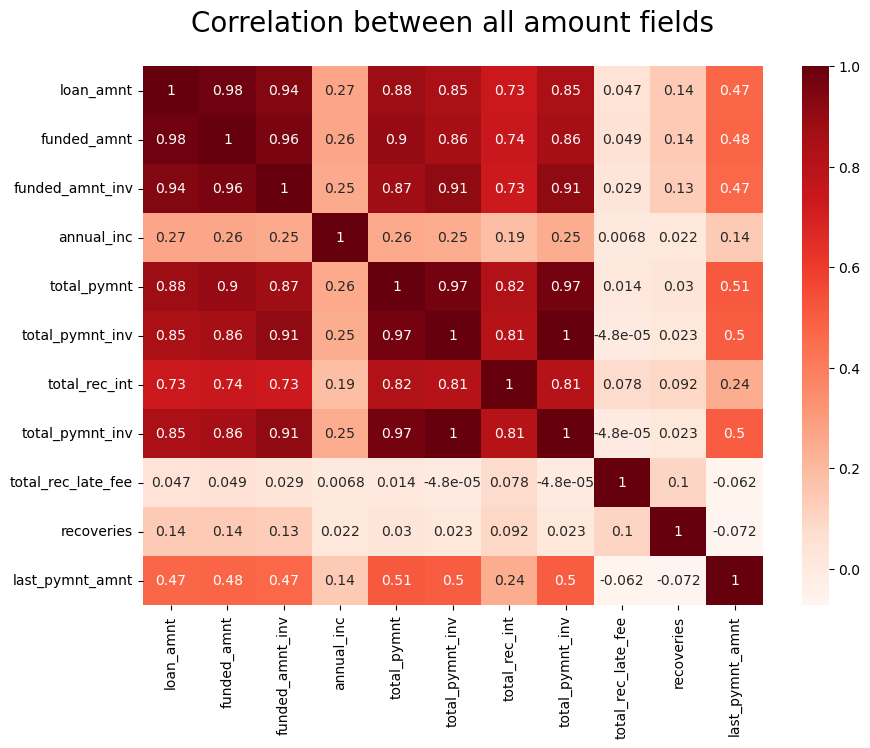

In [45]:
cols = ["loan_amnt","funded_amnt","funded_amnt_inv","annual_inc","total_pymnt","total_pymnt_inv","total_rec_int","total_pymnt_inv","total_rec_late_fee","recoveries","last_pymnt_amnt"]  # putting irrevlent columns in varibale "irrev"
plt.figure(figsize= [10,7])

sns.heatmap(df[cols].corr(), cmap="Reds",annot=True)

plt.title("Correlation between all amount fields", fontdict={"fontsize":20}, pad=25)
plt.show()

**Observations**  

There is a high co-relation between loam_amount, funded_amt, total_payment but they co-relate less with annual_income

### Bivariate Analysis Observations

The majority of charged-off loans are associated with an annual income ranging between $50,000 and $80,000, particularly when the loan purpose is home improvement.

Charged-off loans are most prevalent when the loan amount falls within the $10,000 to $15,000 range and the ownership type is classified as mortgage.

A significant proportion of charged-off loans falls within the G and F grade categories, as indicated by the chart.

Loan applications resulting in charge-offs often pertain to individuals seeking funds for small business purposes.

Individuals with lower annual incomes exhibit a higher likelihood of experiencing charged-off loans.

Applicants with a longer employment history tend to secure higher loan approval amounts, contributing to an increased total amount of charged-off loans.

The highest number of charged-off loans occurred in the year 2007.


## Final conclusion

Grade 'B' and Sub-Grade 'B5' loans consistently exhibit the highest charge-offs, highlighting a critical risk area for lenders.

The Approved Loan Amount Percentage, indicating that a majority of loans were fully funded, reflects a positive trend in the lending portfolio.

Loans within the $5000-$10000 range face a heightened risk of charge-offs, emphasizing the need for careful assessment in this loan bracket.

Loans sanctioned in December 2011 pose an elevated risk of charge-offs, suggesting potential external factors influencing loan defaults during that specific time frame.

Overall, key risk factors contributing to charge-offs include not verified status, rented accommodations, debt consolidation loan purposes, interest rates ranging from 9% to 14.5%, and Grade 'F' and 'G' loans with higher amounts and longer tenures.